<div class = "alert alert-block alert-info">
Materiały uzupełniające do zajęć z przedmiotu "Przetwarzanie multimediów"
    
Sem. letni 2022/2023

FTiMS, Politechnika Gdańska
</div>

#### Instalacja i ładowanie pakietów 

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

#### Wyświetlanie obrazu (matplotlib)

Z punktu widzenia metod przetwarzania obraz to (w uproszczeniu) macierz wartości poszczególnych punktów stanowiących taki obraz. Wartości przechowywane są w postaci macierzy. 

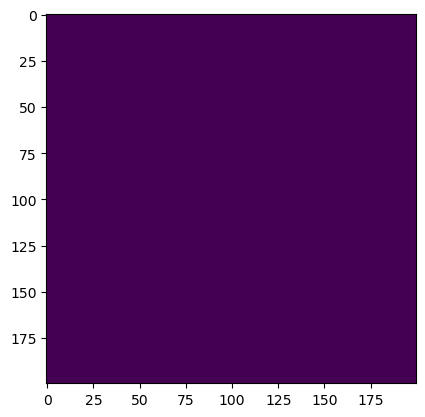

In [2]:
a = np.zeros((200,200), dtype = np.uint8)
plt.imshow(a)

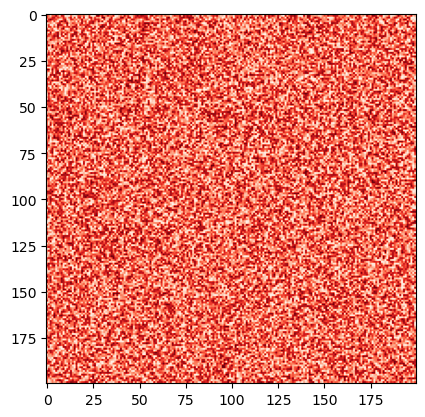

In [3]:
# obraz "jednobarwny" - w poziomach szarości - każdy piksel jest liczbą (skalarem) - jego wartość odpowiada natężeniu światła
a = np.random.randint(0,256,(200,200))
plt.imshow(a, cmap = 'Reds') 

<div class = "alert alert-block alert-info">
<b> Pytanie: </b> Dlaczego wyświetlony obraz jest barwny? 
<b> Odpowiedź </b> To wynika ze standardowego reprezentowania wartości (liczby) przez funkcje rysujące
</div>

Jak wyżej, ale dodajmy legendę - odwzorowanie wartości na barwę na ekranie

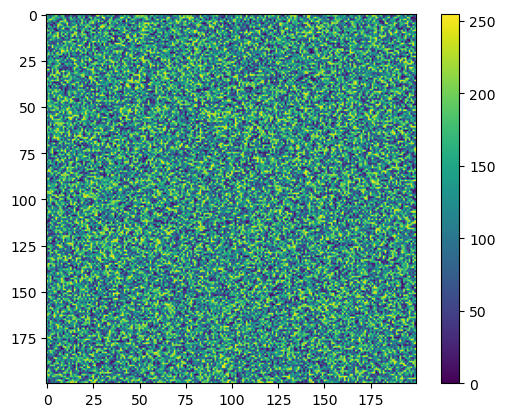

In [4]:
plt.imshow(a)
plt.colorbar()

oraz wymuśmy odwzorowanie do którego w przypadku obrazów mono wszyscy są przyzwyczajeni (poziomy szarości):

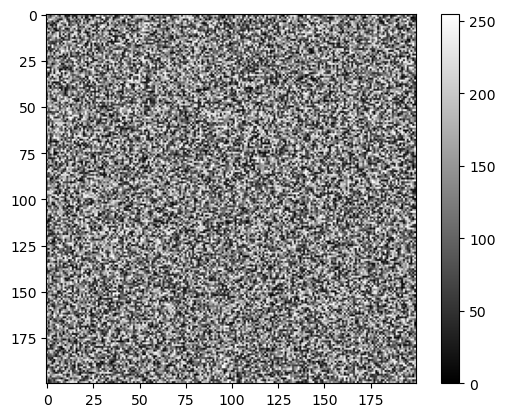

In [5]:
plt.imshow(a, cmap = 'gray')
plt.colorbar()

Cztery pierwsze skalarne piksele obrazu:

In [6]:
a[:2, :2]

array([[158, 245],
       [164, 112]])

#### Jak "rozumieć" wartości pikseli?

Jak przykład zbudujmy obraz złożonych z pikseli o tych samych wartościach. Składowe barwy ustalają składowe "świateł" tworzących wrażenie barwne. Poeksperymentuj i sprawdź jakie kombinacje wywołują dane wrażenie barwne.

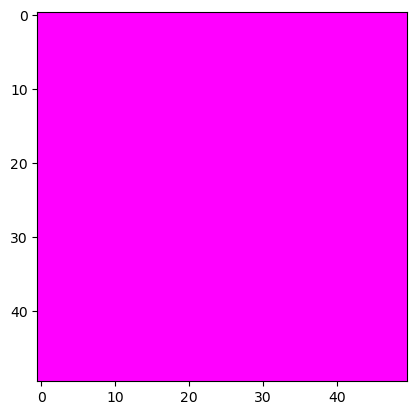

In [7]:
image = np.zeros(shape = (50,50,3), dtype = np.uint8)
image[:,:, 0] = 255
image[:, :, 1] = 0
image[:, :, 2] = 255
plt.imshow(image)

# Pakiet OpenCV

Podstawy: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

#### Wczytanie i podstawowe transformacje obrazu

In [8]:
image = cv2.imread('691.jpg')

In [9]:
type(image)

numpy.ndarray

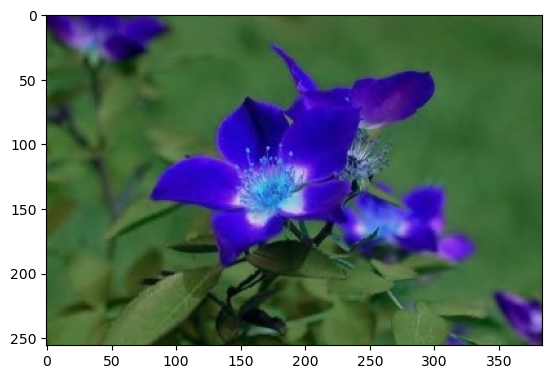

In [10]:
plt.imshow(image)

Sprawdź typ uzyskanego obiektu. Różne pakiety zwracają różne typy (klasy) obiektów

In [11]:
type(image)

numpy.ndarray

Geometria obrazu: wiersze x kolumny x kanały 

In [12]:
image.shape

(256, 384, 3)

4 pierwsze pikseli.Konwencja barw: BGR - standardowy sposób opisu barwy w openCV.

In [13]:
image[:2,:2,:]

array([[[30,  6, 84],
        [30,  5, 85]],

       [[28,  4, 82],
        [28,  4, 82]]], dtype=uint8)

Konwersja do konwencji RGB

In [14]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [15]:
image_rgb[:2,:2,:]

array([[[84,  6, 30],
        [85,  5, 30]],

       [[82,  4, 28],
        [82,  4, 28]]], dtype=uint8)

In [16]:
image_gray = cv2.imread('691.jpg', cv2.IMREAD_GRAYSCALE)

In [17]:
image_gray.shape

(256, 384)

Cztery pierwsze piksele obrazu (podmacierz 2x2). **Obraz jest reprezentowany jako macierz wartości poszczególnych pikseli. W przypadku obrazów barwnych piksele są wektorami, dla obrazów "mono" piksele są skalarami. Operacje przetwarzania obrazów są operacjami wykonywanymi na macierzach wartości pikseli**

In [18]:
image[:2,:2,:]

array([[[30,  6, 84],
        [30,  5, 85]],

       [[28,  4, 82],
        [28,  4, 82]]], dtype=uint8)

Wyświetlenie obrazu w oknie openCV

In [19]:
cv2.imshow('',image[:200,:200,:])
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Proste przekształcenia obrazu

Przykład 1

In [59]:
image = cv2.imread('691.jpg')

In [60]:
image.shape

(256, 384, 3)

In [61]:
image[100:140,200:220,:] = [0,255,0] 

In [62]:
image[:, 150,: ] = 255

In [63]:
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Przykład 2

In [65]:
image.shape[0]

256

In [66]:
image = cv2.imread('691.jpg')
for i in range(0,image.shape[0],20):
    image[i,:,:] = [0,255,0]

for i in range(0, image.shape[1],20):
    image[:,i,:] = [255,0,0]

In [ ]:
cv2.imshow('original image',image)
cv2.waitKey(0) 
cv2.destroyAllWindows()

<div class = "alert alert-block alert-warning">
<b> Zadanie (0.5 punktu): </b> Dodaj do obrazu losowe 50% zakłócenie pikselami "białymi", tj. każdy oryginalny piksel z prawdopodobieństwem 50% zakłóć pikselem RGB = (255,255,255) 
</div>

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
image = cv2.imread('691.jpg')
for w in range(0, image.shape[0]):
    for k in range(0, image.shape[1]):
        if np.random.choice(2):
            image[w, k, :] = 255

In [3]:
cv2.imshow('corrupted image - random', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Kanały barwne

In [29]:
image = cv2.imread('691.jpg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'wartosc piksela (składowa B)')

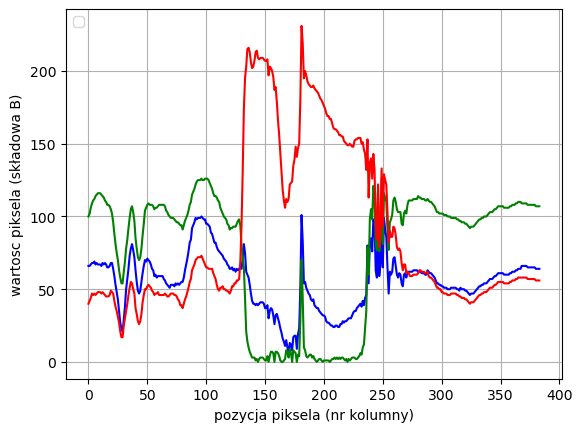

In [30]:
row100B = image[100,:,0] # składowa B piksela BGR
row100G = image[100,:,1] # G
row100R = image[100,:,2] # R
plt.plot(row100B, c = 'blue')
plt.plot(row100G, c = 'green')
plt.plot(row100R, c = 'red')
plt.grid()
plt.legend(loc = 'upper left')
plt.xlabel('pozycja piksela (nr kolumny)')
plt.ylabel('wartosc piksela (składowa B)')

#### Wczytanie w skali szarości

In [31]:
image_gray = cv2.imread('691.jpg', cv2.IMREAD_GRAYSCALE)

In [32]:
image = cv2.imread('691.jpg')

In [33]:
print( type(image)); print(type(image_gray))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [34]:
print(image.shape); print(image_gray.shape)

(256, 384, 3)
(256, 384)


In [ ]:
cv2.imshow('',image)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [36]:
cv2.imshow('', image_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### BGR vs RGB

Uwaga: openCV przetwarza obrazy w formacie BGR, a nie RGB.

In [2]:
image = cv2.imread('691.jpg')

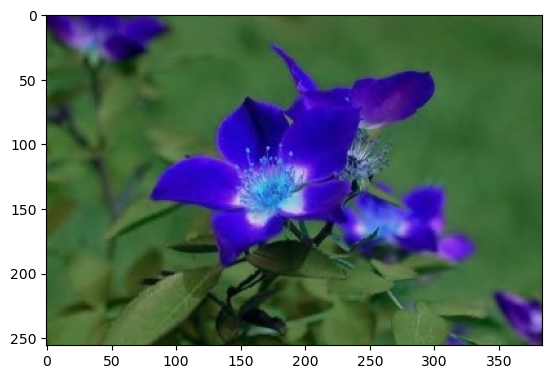

In [3]:
plt.imshow(image) # wyświetlenie obrazu bez konwersji BGR --> RGB --> openCV czyta BGR, natomiast pyplot wyświetla RGB --> niezgodność. Wniosek: obraz wyświetli się nieprawidłowo

([], [])

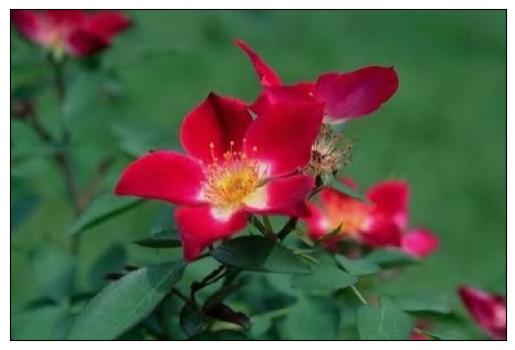

In [4]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # konwersja BGR --> RGB
plt.imshow(image)
plt.xticks([])
plt.yticks([])

#### Izolowanie składowych barwy

In [2]:
image = cv2.imread('691.jpg')
image[:,:,0] = 0
cv2.imshow('skladowa B = 0', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
image = cv2.imread('691.jpg')
image[:,:,1] = 0
cv2.imshow('skladowa G = 0', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
image = cv2.imread('691.jpg')
image[:,:,2] = 0
cv2.imshow('skladowa R = 0', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### matplotlib

In [5]:
image = cv2.imread('691.jpg')

Uwaga: pamiętaj, openCV wczytuje obraz w formacie BGR. Jeśli wykorzystujesz inne pakiety, np. matplotlib, to konieczna jest transformacja BGR --> RGB

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB); #sprawdź jaki będzie efekt, gdy po wczytaniu obrazu (wiersz wyżej) ta transformacja nie zostanie wykonana

In [7]:
imageB = image.copy()
imageB[:,:,0] =0
imageG = image.copy()
imageG[:,:,1] = 0
imageR = image.copy()
imageR[:,:,2] = 0

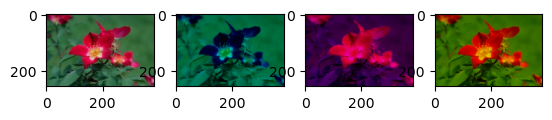

In [10]:
plt.subplot(1,4,1)
plt.imshow(image)
plt.subplot(1,4,2)
plt.imshow(imageB)
plt.subplot(1,4,3)
plt.imshow(imageG)
plt.subplot(1,4,4)
plt.imshow(imageR)

#### matplolib czytanie obrazu

In [11]:
img = plt.imread('691.jpg')

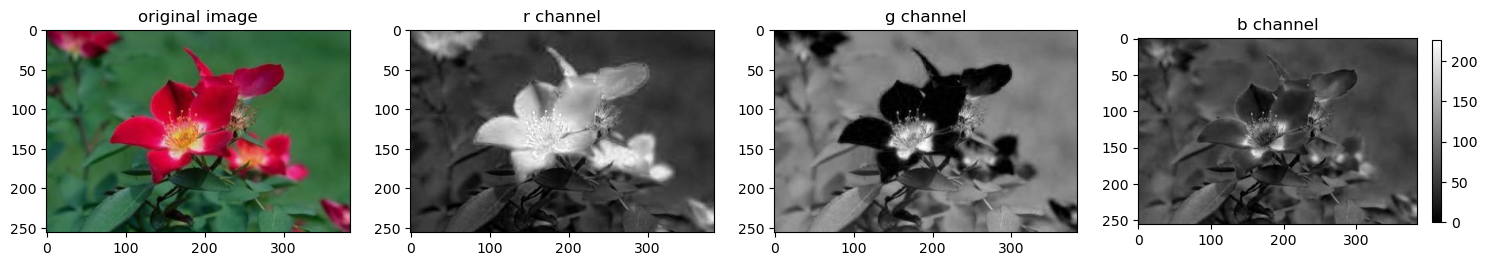

In [12]:
plt.figure(figsize = (18,15))
plt.subplot(1,4,1)
plt.imshow(img)
plt.title('original image')
plt.subplot(1,4,2)
plt.imshow(img[:,:,0], cmap = 'gray')
plt.title('r channel')
plt.subplot(1,4,3)
plt.imshow(img[:,:,1], cmap = 'gray')
plt.title('g channel')
plt.subplot(1,4,4)
plt.imshow(img[:,:,2],  cmap = 'gray')
plt.title('b channel')
plt.colorbar(fraction=0.03, pad = 0.05)

Uwaga: sposób reprezentacji wartości składowej barwy można dobrać prawie dowolnie: dlaczego min = "czarny", a max = "biały"? Poniżej kilka możliwych reprezentacji wartości (*color mappings*)

In [13]:
img = plt.imread('691.jpg')

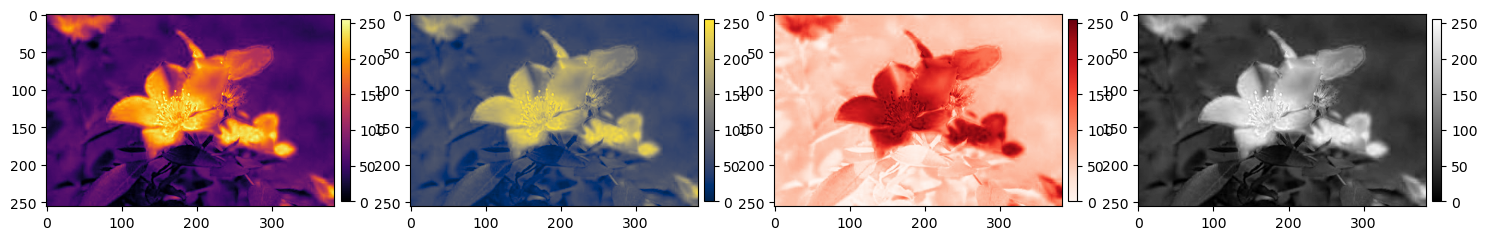

In [14]:
plt.figure(figsize = (18,15))
plt.subplot(1,4,1)
plt.imshow(img[:,:,0], cmap = 'inferno')
plt.colorbar(fraction = 0.03, pad = 0.02)

plt.subplot(1,4,2)
plt.imshow(img[:,:,0], cmap = 'cividis')
plt.colorbar(fraction = 0.03, pad = 0.02)

plt.subplot(1,4,3)
plt.imshow(img[:,:,0], cmap = 'Reds')
plt.colorbar(fraction = 0.03, pad = 0.02)

plt.subplot(1,4,4)
plt.imshow(img[:,:,0], cmap = 'gray')
plt.colorbar(fraction = 0.03, pad = 0.02)

#### Patchwork

<div class = "alert alert-block alert-warning">
<b> Zadanie (0.5 punktu): </b> Korzystając z poniższego przykładu wykonaj analogiczny patchwork, ale dla obrazu barwnego RGB. W takim przypadku piksele są wektorami. To jedyna zmiana w stosunku do przedstawionego przykładu. Barwy obrazów składowych wybierz dowolnie.
</div>

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img1 = 255 * np.ones(shape = (50,50), dtype = np.uint8)
img2 = 192 *np.ones(shape = (50,50), dtype = np.uint8)
img3 = 128 * np.ones(shape = (50,50), dtype = np.uint8)
img4 = 64 * np.ones(shape = (50,50), dtype = np.uint8)

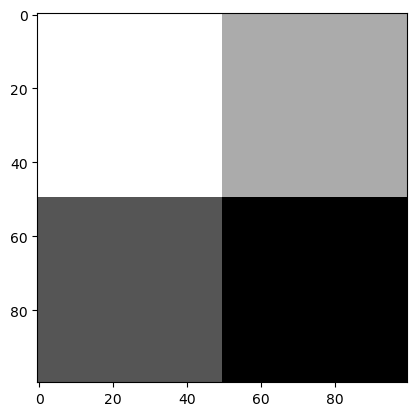

In [18]:
row1 = np.concatenate([img1,img2], axis = 1)
row2 = np.concatenate([img3,img4], axis = 1)
img = np.concatenate([row1, row2], axis = 0)
plt.imshow(img,cmap = 'gray')
#plt.xticks([])
#plt.yticks([])
#plt.axis(False);

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
img1 = np.zeros(shape = (50,50,3), dtype = np.uint8)
img2 = np.zeros(shape = (50,50,3), dtype = np.uint8)
img3 = np.zeros(shape = (50,50,3), dtype = np.uint8)
img4 = np.zeros(shape = (50,50,3), dtype = np.uint8)

In [26]:
def foo(img):
    img[:, :, 0] = np.random.randint(0, 255)
    img[:, :, 1] = np.random.randint(0, 255)
    img[:, :, 2] = np.random.randint(0, 255)

In [27]:
foo(img1)
foo(img2)
foo(img3)
foo(img4)

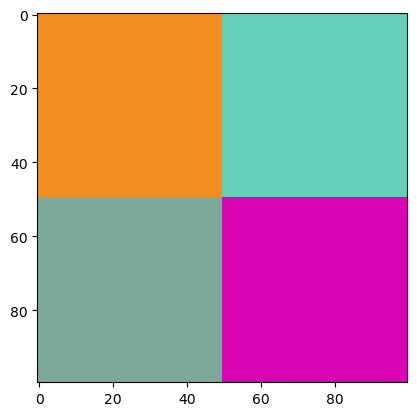

In [33]:
row1 = np.concatenate([img1,img2], axis = 1)
row2 = np.concatenate([img3,img4], axis = 1)
img = np.concatenate([row1, row2], axis = 0)
plt.imshow(img) # domyslnie uzywa RGB dla vec 3 elementowego
#plt.xticks([])
#plt.yticks([])
#plt.axis(False);

# Przestrzenie barw (RGB, HSV, YUV)

In [4]:
import cv2
import numpy as np

In [5]:
imageBGR = cv2.imread(r'691.jpg')
imageHSV = cv2.cvtColor(imageBGR,cv2.COLOR_BGR2HSV)

In [6]:
cv2.imshow('bgr',imageBGR)
cv2.imshow('hsv',imageHSV)
cv2.imshow('(H)SV',imageHSV[:,:,0])
cv2.imshow('H(S)V',imageHSV[:,:,1])
cv2.imshow('HS(V)',imageHSV[:,:,2])
cv2.imshow('(R)GB',imageBGR[:,:,2])
cv2.imshow('R(G)B', imageBGR[:,:,1])
cv2.imshow('RG(B)',imageBGR[:,:,0])
cv2.waitKey(0)
cv2.destroyAllWindows()

Uwagi: 
1. Obraz składowej H przestrzeni HSV wskazuje, że możliwe jest wykorzystanie takiego zapisu barwy do segmentacji ze względu na barwy

#### Analiza w przestrzeni HSV

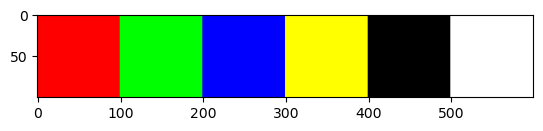

In [7]:
img1 = np.array( [255,0,0]*10000 ).reshape((100,100,3))
img2 = np.array( [0,255,0]*10000 ).reshape((100,100,3))
img3 = np.array( [0,0,255]*10000 ).reshape((100,100,3))
img4 = np.array( [255,255,0]*10000 ).reshape((100,100,3))
img5 = np.array( [0,0,0]*10000 ).reshape((100,100,3))
img6 = np.array( [255,255,255]*10000 ).reshape((100,100,3))
img = np.concatenate([img1,img2,img3,img4,img5,img6], axis = 1)
img = img.astype(np.uint8) #uwaga: brak konwersji do typu uint8 będzie powodować błędy po stronie metod pakietu openCV
plt.imshow(img)

przygotowanie dla pakietu CV2 (RGB --> BGR) oraz konwersja do HSV

In [10]:
img_BGR = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
cv2.imshow('RGB',img)
cv2.imshow('BGR',img_BGR)
cv2.imshow('HSV',img_HSV)
cv2.waitKey(0)
cv2.destroyAllWindows()

Warto zwrócić uwagę na reprezentację barwnych bloków w przykładu powyżej w składowych HSV. W szczególności 4 pierwsze obrazy ("czerwony", "zielony", "niebieski" oraz "żółty") w składowych S oraz V modelu HSV mają wartość maksymalną - są więc nierozróżnialne.

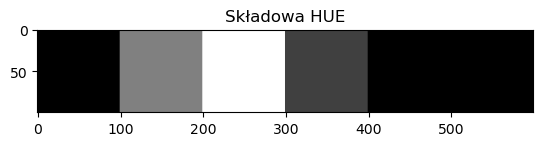

In [11]:
plt.imshow(img_HSV[:,:,0], cmap = 'gray')
plt.title('Składowa HUE');

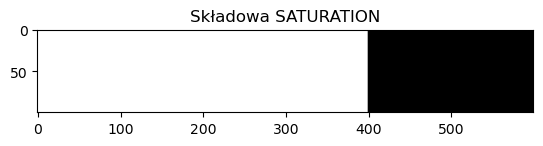

In [12]:
plt.imshow(img_HSV[:,:,1], cmap = 'gray')
plt.title('Składowa SATURATION');

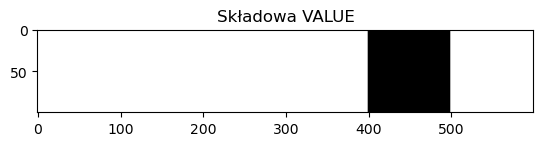

In [13]:
plt.imshow(img_HSV[:,:,2], cmap = 'gray')
plt.title('Składowa VALUE');

<div class = "alert alert-block alert-warning">
<b> Zadanie (0.5 punktu): </b> Przygotuj macierz obrazu dowolnego wymiaru, np. 100x100, a następnie za pomocą metod rysujących, np. cv2.line zmodyfikuj swój obraz. Wyświetl macierz (fragment macierzy) zmodyfikowanego obrazu. Czy dodany przez Ciebie element graficzny na obrazie ma swoją reprezentację w wartościach pikseli (lub inaczej: czy "narysowany" obiekt ma swoją reprezentację w wartościach pikseli obrazu po modyfikacji?)

Przed rozwiązaniem zadania zapoznaj się z poniższymi przykładami.

1. https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html
1. https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_gui/py_drawing_functions/py_drawing_functions.html


</div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
img = np.zeros((100, 100, 3), np.uint8)
cv2.rectangle(img,(10,10),(50, 50),(0,200, 255),3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
cv2.imshow('', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0, 0.5, 'wartosc piksela')

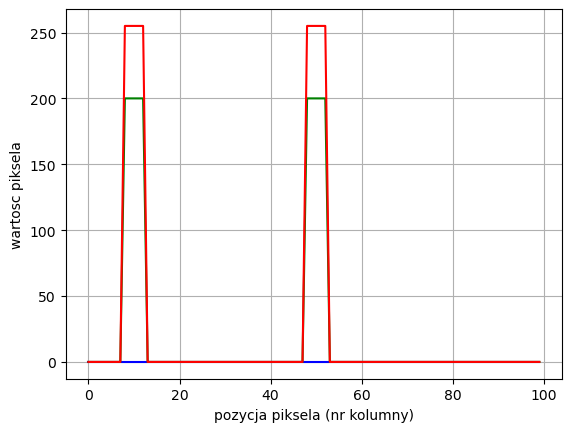

In [24]:
rowB = img[20,:,0] # składowa B piksela BGR
rowG = img[20,:,1] # G
rowR = img[20,:,2] # R
plt.plot(rowB, c = 'blue')
plt.plot(rowG, c = 'green')
plt.plot(rowR, c = 'red')
plt.grid()
plt.xlabel('pozycja piksela (nr kolumny)')
plt.ylabel('wartosc piksela')